In [1]:
import mdptoolbox.example
import mdptoolbox

import numpy as np
import matplotlib.pyplot as plt

In [3]:
T, R = mdptoolbox.example.forest(S=25, r1=4, r2=2, p=0.1, is_sparse=False)

discount=0.95

# Helper functions

In [64]:
def evaluate_R(pi):
    Values=pi.Values
    P=pi.P
    R=[]
    
    P1=[0,0]
    for V in Values:
        r=0
        for s in range(len(V)):
            for a in [0,1]:
                P1[a]=0
                for s1 in range(len(V)):
                    P1[a]+=P[a][s,s1]*V[s1]
            r+=V[s]-discount*np.max(P1)
        R.append(r)
    return(R)
    


In [90]:
def evaluate_reward(vi):
    R=[]
    
    if len(vi.Policies)<1000:
        if vi.Policies[0].all()!=None:
            for p in range(len(vi.Policies)):
                r=0
                for i in range(25):
                    s=i
                    for i in range(30):
                        a=vi.Policies[p][s]
                        if a==1:
                            if s<vi.S-1:
                                r+=1
                            else:
                                r+=2
                            s_new=0
                        elif a==0:
                            if s<vi.S-1:
                                s_new=s+1
                            else:
                                s_new=s
                                r+=4
                        s=s_new
                R.append(r/(30*25))
        else:
            for p in range(2,len(vi.Policies)):
                r=0
                for i in range(25):
                    s=i
                    for i in range(30):
                        a=vi.Policies[p][s]
                        if a==1:
                            if s<vi.S-1:
                                r+=1
                            else:
                                r+=2
                            s_new=0
                        elif a==0:
                            if s<vi.S-1:
                                s_new=s+1
                            else:
                                s_new=s
                                r+=4
                        s=s_new
                R.append(r/(30*25))
    else:
        
        for p in range(2,len(vi.Policies), 100):
            r=0
            for i in range(25):
                s=i
                for i in range(30):
                    a=vi.Policies[p][s]
                    if a==1:
                        if s<vi.S-1:
                            r+=1
                        else:
                            r+=2
                        s_new=0
                    elif a==0:
                        if s<vi.S-1:
                            s_new=s+1
                        else:
                            s_new=s
                            r+=4
                    s=s_new
            R.append(r/(30*25))
    return(R)

### Policy iteration plots

# Q_learning

#### Epsilon tuning

In [7]:
epsilons=[0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.8]
Q=[]
evaluations_q=[]
for i in range(len(epsilons)):
    q = mdptoolbox.mdp.QLearning1(T,R,discount = 0.95, n_iter=200000, epsilon1=epsilons[i], alpha=0.1)
    q.run()
    Q.append(q)
    evaluations_q.append(evaluate_reward(q))


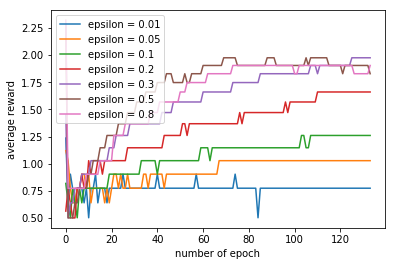

In [8]:

for i in range(len(evaluations_q)):
    rewards=evaluations_q[i]
    epochs = np.arange(len(rewards))
    plt.plot(epochs,rewards,label='epsilon = '+ str(epsilons[i]))
    plt.legend(loc='best')
    plt.xlabel('number of epoch')
    plt.ylabel('average reward')


In [9]:
epsilons=[0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.8]
Q=[]
evaluations_q=[]
for i in range(len(epsilons)):
    q = mdptoolbox.mdp.QLearning1(T,R,discount = 0.3, n_iter=150000, epsilon1=epsilons[i], alpha=0.1)
    q.run()
    Q.append(q)
    evaluations_q.append(evaluate_reward(q))

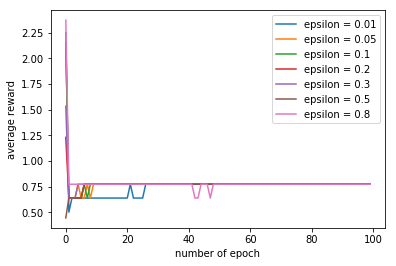

In [47]:

for i in range(len(evaluations_q)):
    rewards=evaluations_q[i]
    epochs = np.arange(len(rewards))
    plt.plot(epochs,rewards,label='epsilon = '+ str(epsilons[i]))
    plt.legend(loc='best')
    plt.xlabel('number of epoch')
    plt.ylabel('average reward')

### alpha tuning

In [13]:
alphas=[0.05, 0.1, 0.2, 0.3, 0.5, 0.8]
Q_alphas=[]
evaluations_q_alphas=[]
for i in range(len(alphas)):
    q = mdptoolbox.mdp.QLearning1(T,R,discount = 0.9, n_iter=150000, epsilon1=0.9, alpha=alphas[i])
    q.run()
    Q_alphas.append(q)
    evaluations_q_alphas.append(evaluate_reward(q))

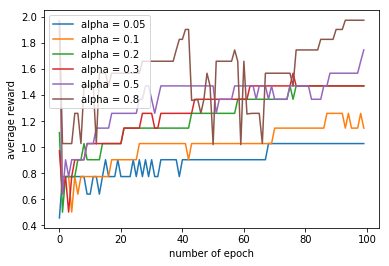

In [14]:
for i in range(len(evaluations_q_alphas)):
    rewards=evaluations_q_alphas[i]
    epochs = np.arange(len(rewards))
    plt.plot(epochs,rewards,label='alpha = '+ str(alphas[i]))
    plt.legend(loc='best')  
    plt.xlabel('number of epoch')
    plt.ylabel('average reward')

In [9]:
q = mdptoolbox.mdp.QLearning1(T,R,discount = 0.95, n_iter=1000000, epsilon1=0.9, alpha=0.1)
q.run()
policy_q=q.policy
Times_q = q.Times
Policy_changes_q = q.Policy_changes
Policies_q = q.Policies
rewards_q=q.rewards
Values_q = q.Values

In [17]:
r_q=evaluate_R(q)

In [22]:
print(r_q[len(r_q)-1])
print(len(r_q))

11.390047538021086
33333


### Value iteration

In [95]:
vi = mdptoolbox.mdp.ValueIteration(T,R,0.9,max_iter = 1000000)
vi.run()
policy_vi=vi.policy
Times_vi = vi.Times
Policy_changes_vi = vi.Policy_changes
Policies_vi = vi.Policies
Values_vi = vi.Values


In [ ]:
iter_vi = np.arange(len(Value_changes))
plt.plot(iter_vi , Value_changes )
plt.ylabel('Innovation')
plt.xlabel('Number of iterations')
plt.show()

#### Training time

In [96]:
print(vi.time)

0.0


No handles with labels found to put in legend.


Text(0, 0.5, 'Cumulated Training Time')

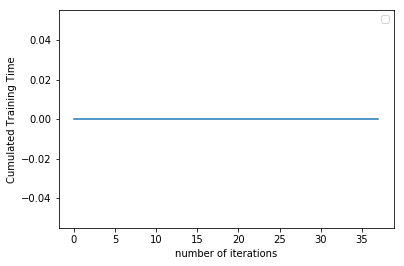

In [75]:
epochs = np.arange(len(Times_vi))
plt.plot(epochs,np.cumsum(Times_vi))
plt.legend(loc='best')
plt.xlabel('number of iterations')
plt.ylabel('Cumulated Training Time')

### Gamma tuning

In [42]:
gammas = [0.1, 0.3 , 0.5, 0.75, 0.9, 0.92, 0.95]
VIs_gamma=[]
for gamma in gammas:
    vi = mdptoolbox.mdp.ValueIteration(T,R,gamma,max_iter = 1000000)
    vi.run()
    VIs_gamma.append(vi)
    

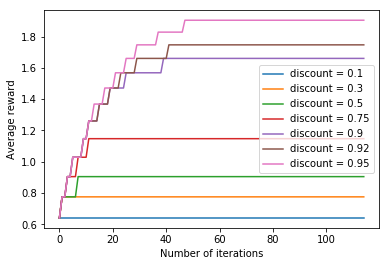

In [88]:
for i in range(len(VIs_gamma)):
    rewards=evaluate_reward(VIs_gamma[i])
    epochs = np.arange(len(evaluate_reward(VIs_gamma[6])))
    while len(rewards)<len(epochs):
        rewards.append(rewards[len(rewards)-1])
    plt.plot(epochs,rewards,label='discount = '+ str(gammas[i]))
    plt.legend(loc='best')
    plt.xlabel('Number of iterations')
    plt.ylabel('Average reward')

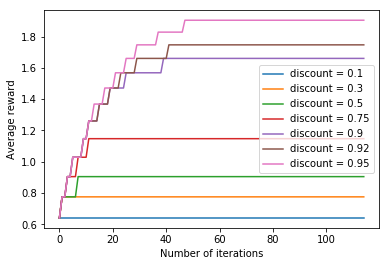

In [78]:
for i in range(len(VIs_gamma)):
    rewards=evaluate_reward(VIs_gamma[i])
    epochs = np.arange(len(evaluate_reward(VIs_gamma[6])))
    while len(rewards)<len(epochs):
        rewards.append(rewards[len(rewards)-1])
    plt.plot(epochs,rewards,label='discount = '+ str(gammas[i]))
    plt.legend(loc='best')
    plt.xlabel('Number of iterations')
    plt.ylabel('Average reward')

### Innovation and policy changes

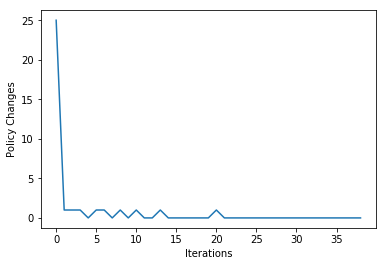

In [13]:
iter_vi = np.arange(len(Policy_changes_vi))
plt.plot(iter_vi , Policy_changes_vi )
plt.ylabel('Policy Changes')
plt.xlabel('Iterations')
plt.show()

In [ ]:
#values changes
Values_vi = vi.Values
Value_changes=[]
for i in range(1,len(Values_vi)):
    change=np.sum(np.abs(Values_vi[i]-Values_vi[i-1]))
    Value_changes.append(change)
    

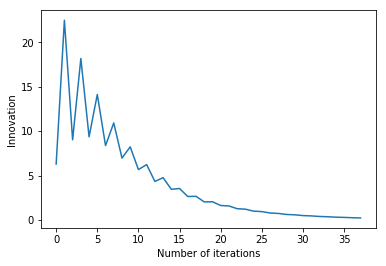

In [94]:
iter_pi = np.arange(len(Value_changes))
plt.plot(iter_pi , Value_changes )
plt.ylabel('Innovation')
plt.xlabel('Number of iterations')
plt.show()

# Policy iteration

In [111]:
pi = mdptoolbox.mdp.PolicyIteration(T, R, discount=0.95, max_iter=30, eval_type=0)
pi.run()
policy_pi=pi.policy
Times_pi = pi.Times
Policy_changes_pi = pi.Policy_changes
Policies_pi = pi.Policies
Values_pi = pi.Values


In [112]:
print(policy_pi)

(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


In [113]:
print(pi.Times)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


### Training time

No handles with labels found to put in legend.


Text(0, 0.5, 'Cumulated Training Time')

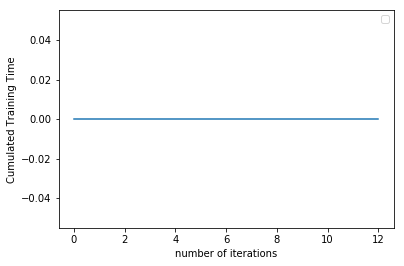

In [119]:
epochs = np.arange(len(Times_pi))
plt.plot(epochs,np.cumsum(Times_pi))
plt.legend(loc='best')
plt.xlabel('number of iterations')
plt.ylabel('Cumulated Training Time')

### Gamma tuning

In [67]:
gammas = [0.1, 0.3 , 0.5, 0.75, 0.9, 0.92, 0.95]
PIs_gamma=[]
for gamma in gammas:
    pi = mdptoolbox.mdp.PolicyIteration(T,R,discount=gamma,max_iter = 10000)
    pi.run()
    PIs_gamma.append(pi)

[0.64]
[0.64, 0.7746666666666666]
[0.64, 0.7746666666666666, 0.904]
[0.64, 0.7746666666666666, 0.904, 1.028, 1.1466666666666667]
[0.64, 0.7746666666666666, 0.904, 1.028, 1.1466666666666667, 1.26, 1.368, 1.4706666666666666, 1.568, 1.66]
[0.64, 0.7746666666666666, 0.904, 1.028, 1.1466666666666667, 1.26, 1.368, 1.4706666666666666, 1.568, 1.66, 1.7466666666666666]
[0.64, 0.7746666666666666, 0.904, 1.028, 1.1466666666666667, 1.26, 1.368, 1.4706666666666666, 1.568, 1.66, 1.7466666666666666, 1.828, 1.904]


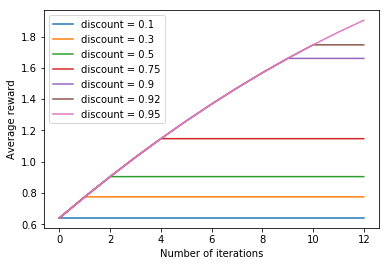

In [93]:
for i in range(len(PIs_gamma)):
    rewards=evaluate_reward(PIs_gamma[i])
    print(rewards)
    epochs = np.arange(len(evaluate_reward(PIs_gamma[6])))
    while len(rewards)<len(epochs):
        rewards.append(rewards[len(rewards)-1])
        
    plt.plot(epochs,rewards,label='discount = '+ str(gammas[i]))
    plt.legend(loc='best')
    plt.xlabel('Number of iterations')
    plt.ylabel('Average reward')

### Policy changes and Innovation

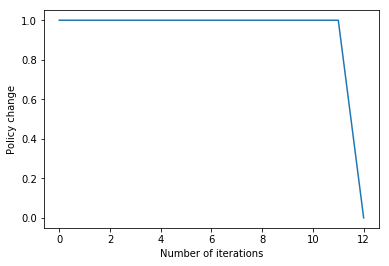

In [115]:
iter_pi = np.arange(len(Policy_changes_pi))
plt.plot(iter_pi , Policy_changes_pi )
plt.ylabel('Policy change')
plt.xlabel('Number of iterations')
plt.show()

In [120]:
#values changes
Values_pi = pi.Values
Value_changes_pi=[]
for i in range(1,len(Values_pi)):
    change=np.sum(np.abs(Values_pi[i]-Values_pi[i-1]))
    Value_changes_pi.append(change)
    

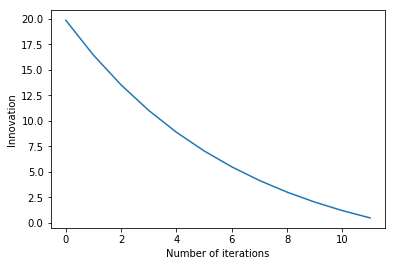

In [118]:
iter_pi = np.arange(len(Value_changes_pi))
plt.plot(iter_pi , Value_changes_pi )
plt.ylabel('Innovation')
plt.xlabel('Number of iterations')
plt.show()